# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [145]:
import pandas as pd
taxi_data = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
df = pd.DataFrame(taxi_data)
df.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [146]:
taxi_data.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [147]:
my_collums = taxi_data[['fare_amount','tip_amount','tolls_amount','total_amount','trip_distance']]
my_collums.describe(include="all")

,fare_amount,tip_amount,tolls_amount,total_amount,trip_distance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659,3.015250
std,13.954762,3.409800,6.437507,19.209255,4.148063
min,-52.000000,0.000000,-6.120000,-65.920000,0.000000
25%,7.000000,0.000000,0.000000,12.375000,0.920000
50%,10.000000,2.000000,0.000000,16.300000,1.500000
75%,16.000000,3.250000,0.000000,22.880000,2.760000
max,176.000000,43.000000,612.000000,671.800000,38.110000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [148]:
df[df.trip_distance==max(df.trip_distance)][['fare_amount','tip_amount','tolls_amount','total_amount']]

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [40]:
import pandas as pd
meteorites = pd.read_csv('../data/Meteorite_Landings.csv')
df = pd.DataFrame(meteorites)
df.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [42]:
meteorites.rename(columns ={'mass (g)':'mass'},inplace=True)
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [44]:
drop_columns = meteorites.columns.str.contains('reclong$|reclat',regex=True)
drop_columns

array([False, False, False, False, False, False, False,  True,  True,
       False])

In [45]:
columns_to_drop = meteorites.columns[drop_columns]
columns_to_drop

Index(['reclat', 'reclong'], dtype='object')

In [46]:
meteorites = meteorites.drop(columns=columns_to_drop)
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,"(-33.16667, -64.95)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [51]:
# first 4 characters of year

meteorites['year2']=meteorites["year"].str[6:10]
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation,year2
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)",1880
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)",1951
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)",1976
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,"(-33.16667, -64.95)",1902


In [53]:
meteorites.loc[:,['year2']]=meteorites.loc[:,['year2']].apply(pd.to_numeric)
meteorites.dtypes

/var/folders/tl/9gqgmkms7wv_s6wj1wybqm5w0000gn/T/ipykernel_91571/1807050881.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  meteorites.loc[:,['year2']]=meteorites.loc[:,['year2']].apply(pd.to_numeric)


name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year            object
GeoLocation     object
year2          float64
dtype: object

In [55]:
meteorites=meteorites.assign(
    year_check = lambda x: x.year2<1970
)
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation,year2,year_check
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)",1880.0,True
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)",1951.0,True
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)",1952.0,True
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)",1976.0,False
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,"(-33.16667, -64.95)",1902.0,True


In [56]:
meteorites.set_index('id',inplace=True)
meteorites.head()

,name,nametype,recclass,mass,fall,year,GeoLocation,year2,year_check
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)",1880.0,True
2,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)",1951.0,True
6,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)",1952.0,True
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)",1976.0,False
370,Achiras,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,"(-33.16667, -64.95)",1902.0,True


In [57]:
meteorites.sort_index(inplace=True)
meteorites.head()

,name,nametype,recclass,mass,fall,year,GeoLocation,year2,year_check
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)",1880.0,True
2,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)",1951.0,True
4,Abajo,Valid,H5,331.0,Found,01/01/1982 12:00:00 AM,"(26.8, -105.41667)",1982.0,False
5,Abbott,Valid,H3-6,21100.0,Found,01/01/1951 12:00:00 AM,"(36.3, -104.28333)",1951.0,True
6,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)",1952.0,True


In [59]:
meteorites.loc[10036:10041]

,name,nametype,recclass,mass,fall,year,GeoLocation,year2,year_check
id,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,01/01/1967 12:00:00 AM,"(31.33333, -82.31667)",1967.0,True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,01/01/1883 12:00:00 AM,"(39.86667, -83.95)",1883.0,True
10038,Enshi,Valid,H5,8000.0,Fell,01/01/1974 12:00:00 AM,"(30.3, 109.5)",1974.0,False
10039,Ensisheim,Valid,LL6,127000.0,Fell,12/23/1491 12:00:00 AM,"(47.86667, 7.35)",1491.0,True
10041,Épinal,Valid,H5,277.0,Fell,01/01/1822 12:00:00 AM,"(48.18333, 6.46667)",1822.0,True


In [82]:
#BONUS
meteorites.sort_values('year').tail(10)
#Problem is that there are no info (null) for some of rows

,name,nametype,recclass,mass,fall,year,GeoLocation,year2,year_check
id,,,,,,,,,
57420,Northwest Africa 7855,Valid,H4,916.0,Found,01/01/2013 12:00:00 AM,"(0.0, 0.0)",2013.0,False
57268,Northwest Africa 7822,Valid,Achondrite-ung,45.8,Found,01/01/2013 12:00:00 AM,"(0.0, 0.0)",2013.0,False
57426,Northwest Africa 7862,Valid,L4/5,317.0,Found,01/01/2013 12:00:00 AM,"(0.0, 0.0)",2013.0,False
57166,Northwest Africa 7755,Valid,Martian (shergottite),30.0,Found,01/01/2013 12:00:00 AM,"(0.0, 0.0)",2013.0,False
57150,Northwest Africa 7701,Valid,CK6,55.0,Found,01/01/2101 12:00:00 AM,"(0.0, 0.0)",2101.0,False
5247,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)",1575.0,True
22614,Rivolta de Bassi,Valid,Stone-uncl,103.3,Fell,12/23/1490 12:00:00 AM,"(45.48333, 9.51667)",1490.0,True
10039,Ensisheim,Valid,LL6,127000.0,Fell,12/23/1491 12:00:00 AM,"(47.86667, 7.35)",1491.0,True
7823,Elbogen,Valid,"Iron, IID",107000.0,Fell,12/24/1399 12:00:00 AM,"(50.18333, 12.73333)",1399.0,True


In [81]:
#Fixing this with dropna method: 
meteorites.query('year.notnull()').head(12)

,name,nametype,recclass,mass,fall,year,GeoLocation,year2,year_check
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)",1880.0,True
2,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)",1951.0,True
4,Abajo,Valid,H5,331.0,Found,01/01/1982 12:00:00 AM,"(26.8, -105.41667)",1982.0,False
5,Abbott,Valid,H3-6,21100.0,Found,01/01/1951 12:00:00 AM,"(36.3, -104.28333)",1951.0,True
6,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)",1952.0,True
7,Abernathy,Valid,L6,2914.0,Found,01/01/1941 12:00:00 AM,"(33.85, -101.8)",1941.0,True
8,Abo,Valid,H,1.2,Found,01/01/1840 12:00:00 AM,"(60.43333, 22.3)",1840.0,True
9,Abu Moharek,Valid,H4,4500.0,Found,01/01/1997 12:00:00 AM,"(27.23944, 29.83583)",1997.0,False
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)",1976.0,False


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [125]:
meteorites.reset_index(inplace=True)

In [126]:
meteorite = meteorites.query('year>=2005 and year<=2009')

In [128]:
meteorite

,id,name,nametype,recclass,mass,fall,year,GeoLocation,year2,year_check
26783,31286,Pecora Escarpment 01001,Valid,LL5,19.50,Found,2005-01-01,"(-85.6661, -69.04142)",2005.0,False
26871,31921,Northwest Africa 901,Valid,H5,278.00,Found,2005-01-01,"(0.0, 0.0)",2005.0,False
26891,32766,Lucerne Valley 050,Valid,H4,6.85,Found,2005-01-01,"(34.48728, -116.95833)",2005.0,False
26921,32951,Northwest Africa 2211,Valid,L,27690.00,Found,2005-01-01,"(0.0, 0.0)",2005.0,False
26965,33121,Northwest Africa 2600,Valid,E6,407.00,Found,2006-01-01,"(0.0, 0.0)",2006.0,False
...,...,...,...,...,...,...,...,...,...,...
37966,57292,Catalina 024,Valid,H4,312.00,Found,2009-01-01,"(-25.23333, -69.71667)",2009.0,False
37967,57293,Catalina 025,Valid,L~6,39.00,Found,2009-01-01,"(-25.23333, -69.71667)",2009.0,False
37968,57294,Catalina 026,Valid,H~5,845.00,Found,2009-01-01,"(-25.23333, -69.71667)",2009.0,False
38029,57355,Grove Mountains 090001,Valid,L4,221.50,Found,2009-01-01,"(-72.79642, 74.69339)",2009.0,False


In [130]:
import numpy as np
meteorite.groupby(['year','fall']).agg({'mass':[lambda x : np.quantile(x, q=0.85)],'id': "count"})

mass    id
                   <lambda> count
year       fall                  
2005-01-01 Found   1793.530   328
2006-01-01 Fell   15904.000     5
           Found    261.825  1611
2007-01-01 Fell   67144.800     8
           Found    265.650  1030
2008-01-01 Fell   88200.000     9
           Found    445.500   927
2009-01-01 Fell    6000.200     5
           Found    348.050  1491

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [131]:
meteorite.groupby(['fall']).describe()['mass']

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,27.0,19029.665185,34081.623779,18.41,410.0,3950.0,8206.5,110000.0
Found,5387.0,1605.471158,47161.278480,0.00,5.2,29.4,160.0,3000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [149]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.resample('60min', on='tpep_dropoff_datetime').sum()

/var/folders/tl/9gqgmkms7wv_s6wj1wybqm5w0000gn/T/ipykernel_91571/3775765681.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('60min', on='tpep_dropoff_datetime').sum()


,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_dropoff_datetime,,,,,,,,,,,,,,,
2019-10-23 07:00:00,2,1,0.67,1,263,141,2,4.50,1.00,0.5,0.00,0.00,0.3,8.80,2.50
2019-10-23 08:00:00,4,4,17.07,2,296,418,3,62.50,2.00,1.0,4.00,0.00,0.6,72.60,2.50
2019-10-23 09:00:00,4,4,1.58,3,389,84,4,58.00,5.50,1.0,0.00,0.00,0.6,67.60,2.50
2019-10-23 10:00:00,0,0,0.00,0,0,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
2019-10-23 11:00:00,0,0,0.00,0,0,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
2019-10-23 12:00:00,2,5,2.49,1,262,238,1,13.50,1.00,0.5,2.20,0.00,0.3,20.00,2.50
2019-10-23 13:00:00,6,9,6.98,3,373,308,4,35.50,3.00,1.5,4.45,0.00,0.9,52.85,7.50
2019-10-23 14:00:00,10,11,20.77,5,1036,864,7,90.00,5.00,2.5,11.64,0.00,1.5,123.14,12.50
2019-10-23 15:00:00,32,31,14.34,21,2773,2968,19,213.50,18.50,7.5,51.75,0.00,4.5,333.25,37.50


In [150]:
df.groupby(by="tip_amount")["tpep_dropoff_datetime"].nlargest(5)

tip_amount      
0.00        9183   2019-10-24 17:15:47
            7576   2019-10-24 16:51:44
            6902   2019-10-24 16:50:22
            5907   2019-10-24 16:46:42
            3007   2019-10-24 16:43:04
                           ...        
30.03       7476   2019-10-23 16:11:22
36.00       8868   2019-10-23 16:52:02
37.25       9758   2019-10-23 18:58:16
40.00       4275   2019-10-23 16:15:32
43.00       3304   2019-10-23 16:30:00
Name: tpep_dropoff_datetime, Length: 1844, dtype: datetime64[ns]

--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [3]:
import pandas as pd
import numpy as np
import calendar 
from matplotlib import ticker

In [2]:
tsa_melted_holiday_travel = pd.read_csv(
    '../data/tsa_melted_holiday_travel.csv',
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


In [3]:
plot_data = tsa_melted_holiday_travel['2019':'2021']\
    .assign(year = lambda x: x.index.year)\
    .pivot_table(columns = 'year', values = 'travelers', aggfunc = 'sum')
plot_data

year,2019,2020,2021
travelers,842961073.0,321881594.0,149092738.0


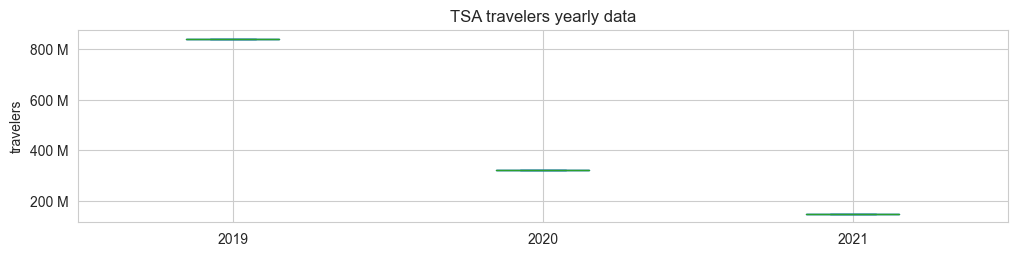

In [49]:
ax = plot_data.plot(
    kind = 'box', rot = 0, xlabel = '', ylabel = 'travelers', title = 'TSA travelers yearly data')

ax.yaxis.set_major_formatter(ticker.EngFormatter())

ax.figure.set_size_inches(12, 2.5)

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [6]:
import seaborn as sns
import pandas as pd
import calendar

In [4]:
tsa_melted_holiday_travel = pd.read_csv(
    '../data/tsa_melted_holiday_travel.csv',
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


In [41]:
data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='median')
data.head()

year,2019,2020,2021
month,,,
1,1955200.0,2004609.0,755028.0
2,2071404.5,2179078.5,884660.0
3,2360053.0,953699.0,1267345.0
4,2412135.0,107347.5,1468595.0
5,2472123.0,234928.0,NaN


Text(0.5, 1.0, 'Median of TSA Traveler Throughput (in millions)')

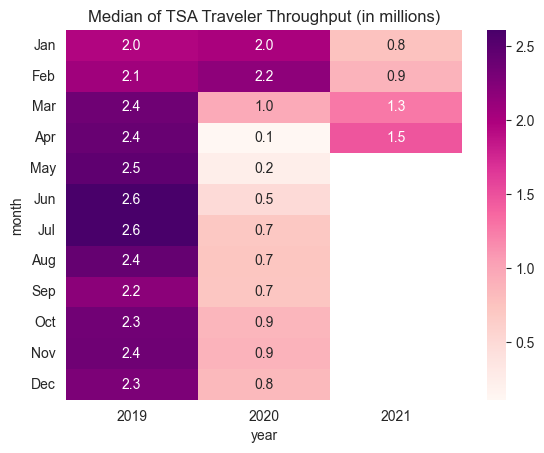

In [42]:
from colorspacious import cspace_converter
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax = sns.heatmap(data=data / 1e6, cmap='RdPu', annot=True, fmt='.1f')
ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
ax.set_title('Median of TSA Traveler Throughput (in millions)')

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.